In [1]:
# Weather Data Analysis
import pandas as pd

In [4]:
df = pd.read_csv('weather_data.csv')

In [5]:
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [6]:
df.dropna(inplace=True)

In [10]:
print(df.columns)

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')


In [16]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')  

In [17]:
print(df['Date_Time'].isnull().sum())

0


In [18]:
print(df[df['Date_Time'].isnull()])

Empty DataFrame
Columns: [Location, Date_Time, Temperature_C, Humidity_pct, Precipitation_mm, Wind_Speed_kmh]
Index: []


In [19]:
df.dropna(subset=['Date_Time'], inplace=True)

In [20]:
print(df['Date_Time'].head())

0   2024-01-14 21:12:46
1   2024-05-17 15:22:10
2   2024-05-11 09:30:59
3   2024-02-26 17:32:39
4   2024-04-29 13:23:51
Name: Date_Time, dtype: datetime64[ns]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Temperature_C', ylabel='Count'>

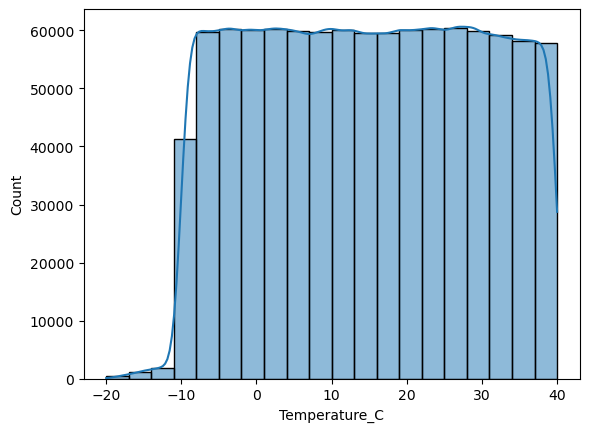

In [24]:
sns.histplot(df['Temperature_C'], bins=20, kde=True)

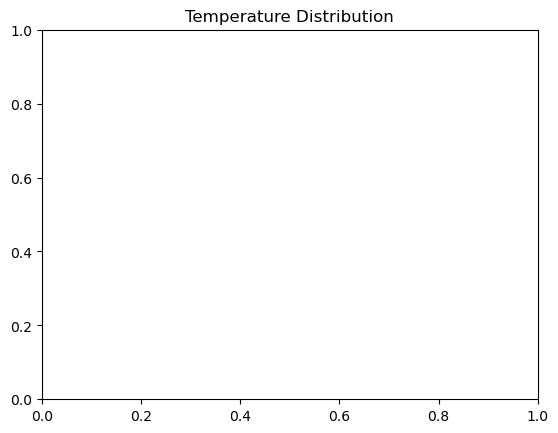

In [26]:
plt.title('Temperature Distribution')
plt.show()

In [28]:
monthly_temp = df.resample('M', on='Date_Time')['Temperature_C'].mean()

In [29]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Date_Time', ylabel='Temperature_C'>

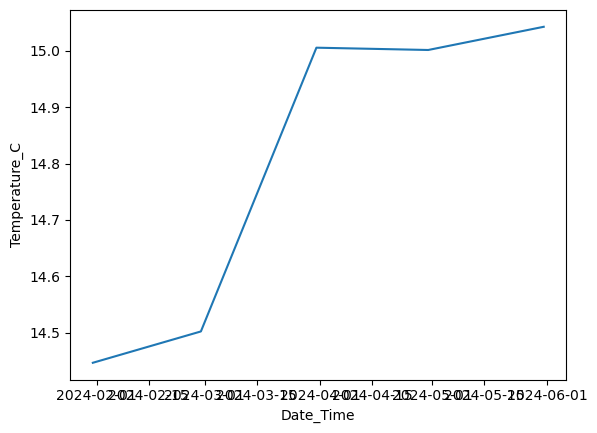

In [30]:
sns.lineplot(data=monthly_temp)

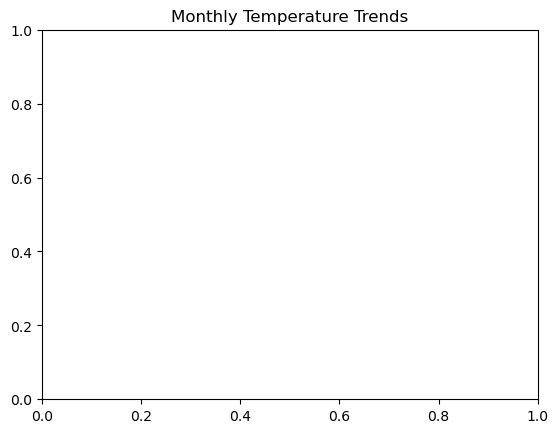

In [32]:
plt.title('Monthly Temperature Trends')
plt.show()

<Axes: >

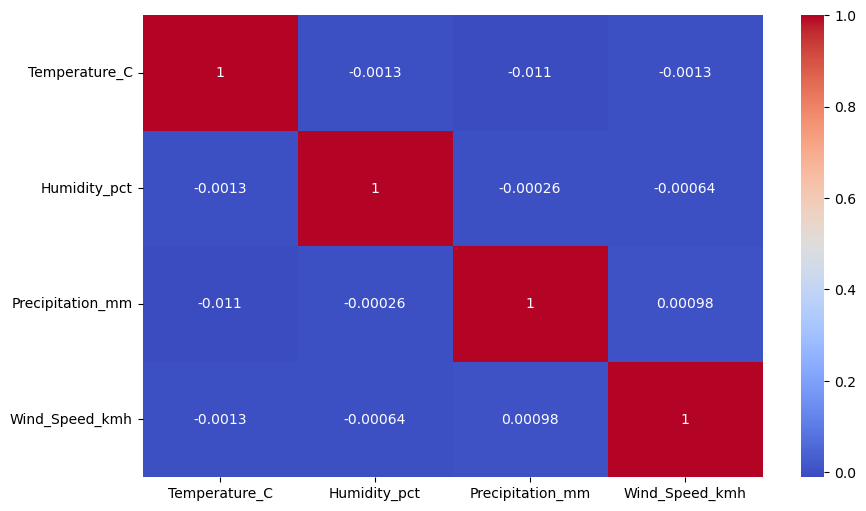

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')